In [306]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [307]:
#Importing Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [308]:
#Preprocessing
X = dataset.drop('Class', 1)
y = dataset['Class']

C:\Users\Рябцква Елизавета\AppData\Local\Temp\ipykernel_12952\426128086.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop('Class', 1)


In [309]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [310]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [311]:
#Applying PCA
from sklearn.decomposition import PCA
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [312]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
principalComponents = pca.fit_transform(X)

In [313]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier


In [314]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [315]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  9  4]
 [ 0  2  4]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.82      0.69      0.75        13
 Iris-virginica       0.50      0.67      0.57         6

       accuracy                           0.80        30
      macro avg       0.77      0.79      0.77        30
   weighted avg       0.82      0.80      0.81        30



In [316]:
# Splitting the dataset 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay


In [317]:
from sklearn.tree import plot_tree


# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

       accuracy                           0.93        30
      macro avg       0.92      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30



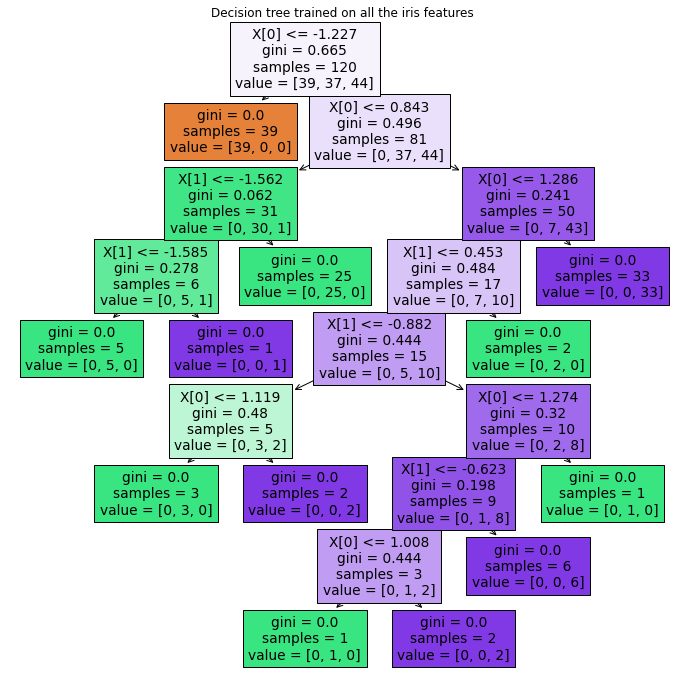

In [318]:
plt.figure(figsize=(12,12))
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [319]:

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [320]:
finalDf = pd.concat([principalDf, dataset[['Class']]], axis = 1)

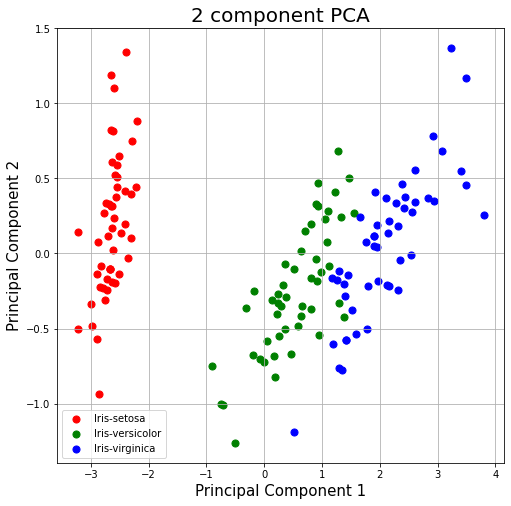

In [321]:
fig = plt.figure(figsize = (8,8)) 
ax = fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 component PCA', fontsize = 20) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 
colors = ['r', 'g', 'b'] 
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['Class'] == target 
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] 
               , finalDf.loc[indicesToKeep, 'principal component 2'] 
               , c = color 
               , s = 50) 
ax.legend(targets) 
ax.grid()